In [1]:
%matplotlib inline
import torch

from DPMoSt import DPMoSt
from utility import data_creation, plot_data, plot_solution

In [2]:
random_state=42
torch.manual_seed(random_state)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device used: {device}')

Device used: cuda


# Data Creation

In [3]:
n_features=3
n_subjects=20
n_time_for_subject=5
time_shifted=True

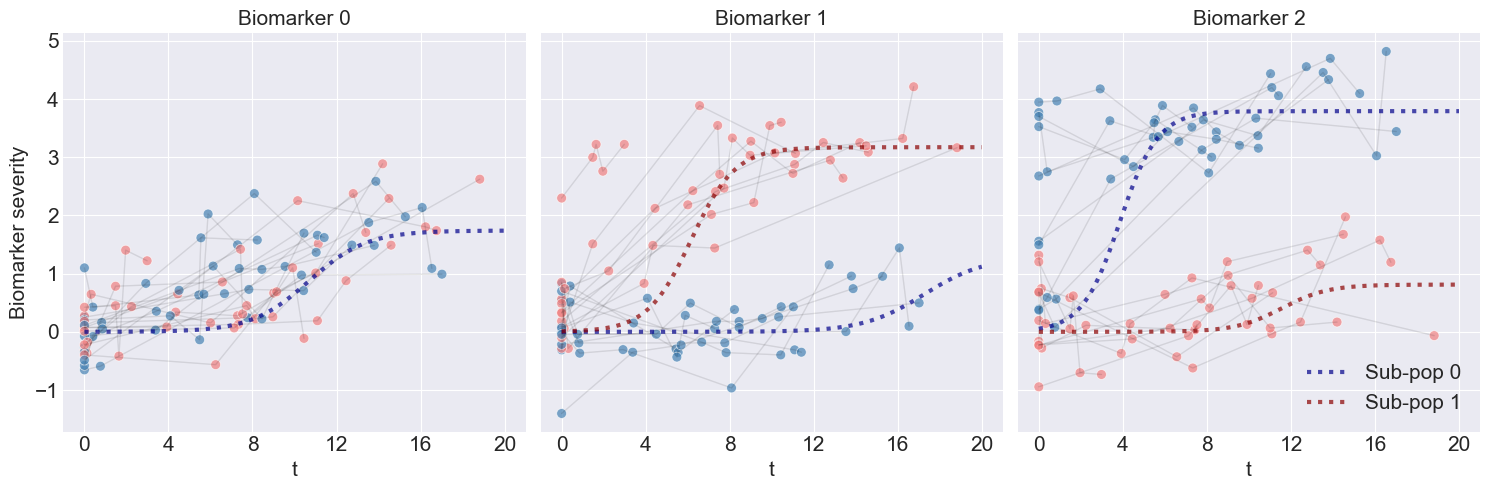

In [4]:
dict_data=data_creation(n_subjects=n_subjects, 
                        n_time_points=n_time_for_subject, 
                        n_features=n_features, 
                        noise_std=0.5, 
                        max_dist=5, 
                        save=False,
                        time_shifted=time_shifted, 
                        device=device)

plot_data(dict_data['data'], dict_data=dict_data, save=False)

# DP-MoSt

In [5]:
dpmost=DPMoSt(data=dict_data['data'], 
              benchmarks=True,
              device=device, 
              time_shift_eval=time_shifted, 
              noise_std_eval=True,
              stopping_criteria=True, 
              theta_eval=True, 
              pi_eval=True, 
              xi_eval=True,
              verbose=True, 
              n_prints=2)

if not dpmost.theta_eval:
    dpmost.theta[f'{dpmost.name_biomarkers[0]}_{0}_split']=dict_data[f'Biomarker_{0}']
    dpmost.theta[f'{dpmost.name_biomarkers[1]}_{1}_split']=dict_data[f'Biomarker_{1}']

if not dpmost.xi_eval: dpmost.xi=torch.tensor(dict_data['xi_true'], device=device)
if not dpmost.pi_eval: dpmost.pi=torch.tensor(dict_data['pi_true'], device=device)

if not dpmost.noise_std_eval: dpmost.log_noise_std=torch.log(dict_data['noise_std'])


Initialisation:
    Num samples: 100
    Num subjects: 20
    Num features: 3
    Evaluation time-shift: True
    Lambda regression: 3.0
    Lambda regression noise: 15.0
    Lambda regression theta: 0.001



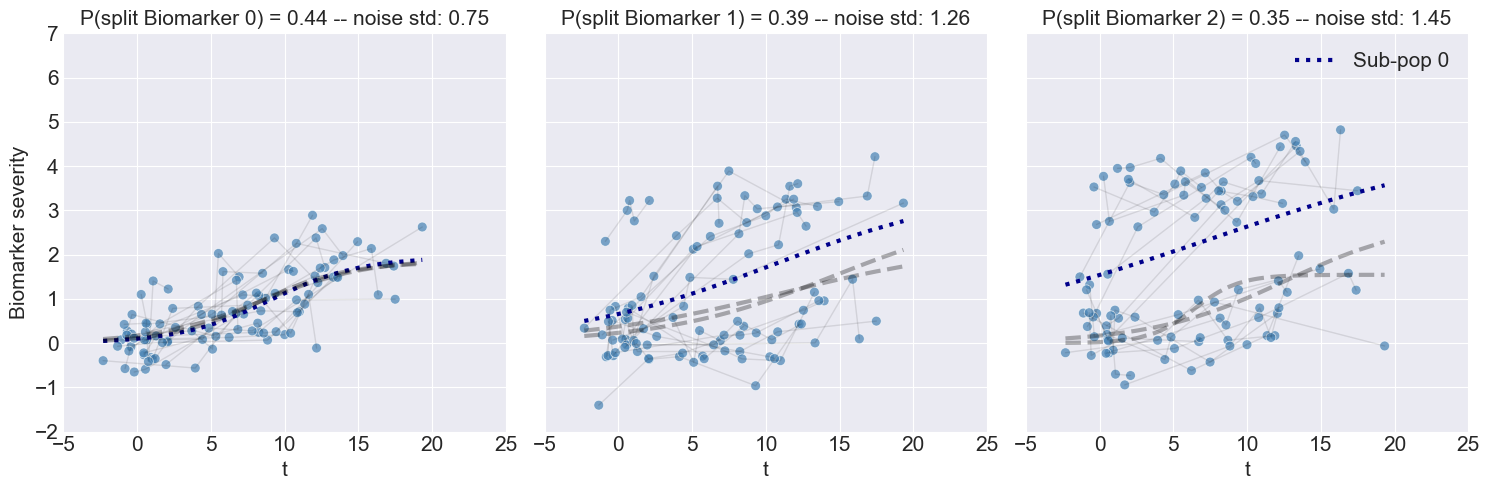

iter 2/30 -- loss: 64624.9961
    P(split Biomarker_0) = 0.4022     P(split Biomarker_1) = 0.3507     P(split Biomarker_2) = 0.3269 
    noisestd Biomarker_0 = 0.7379     noisestd Biomarker_1 = 1.2269     noisestd Biomarker_2 = 0.9172 



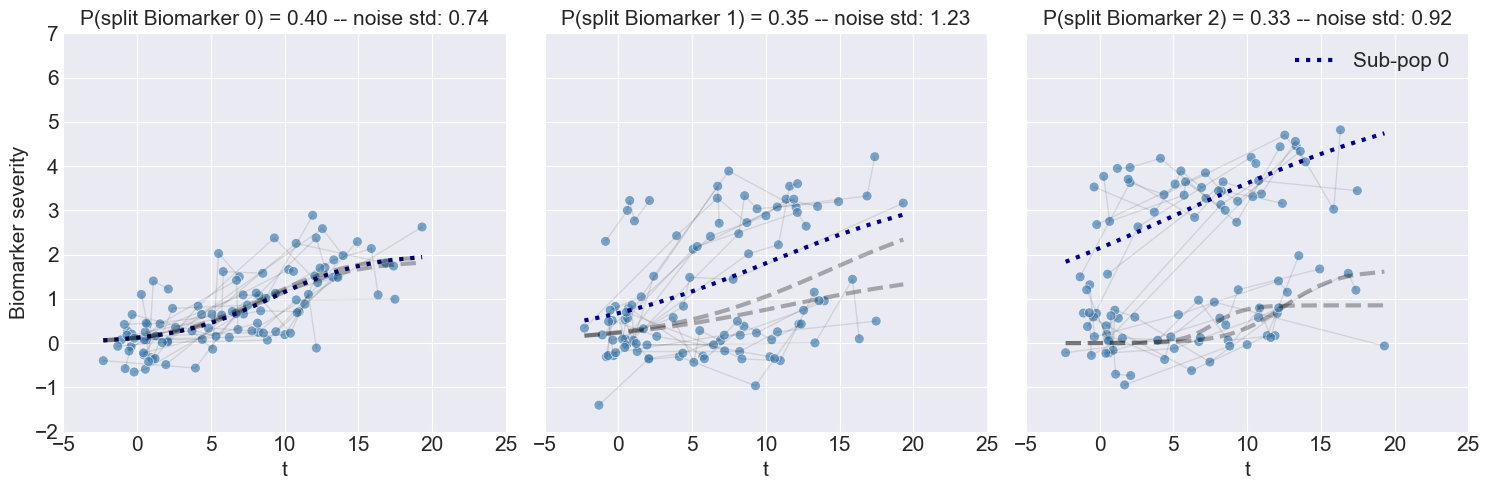

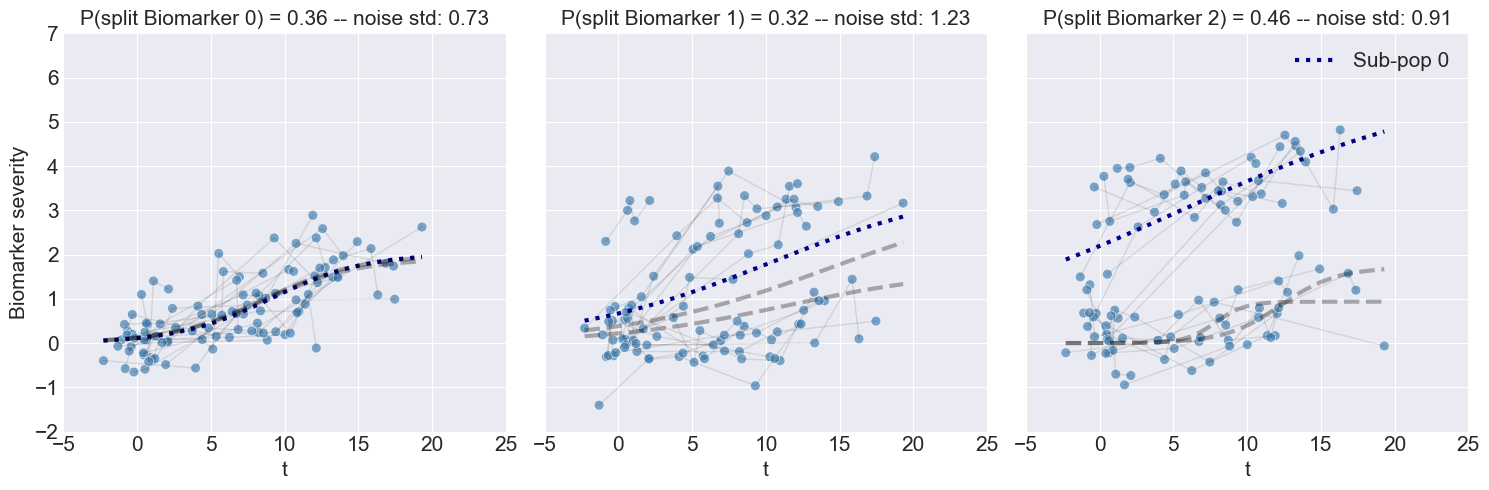

iter 4/30 -- loss: 64553.8281
    P(split Biomarker_0) = 0.3269     P(split Biomarker_1) = 0.2919     P(split Biomarker_2) = 0.4676 
    noisestd Biomarker_0 = 0.7387     noisestd Biomarker_1 = 1.2402     noisestd Biomarker_2 = 0.8874 



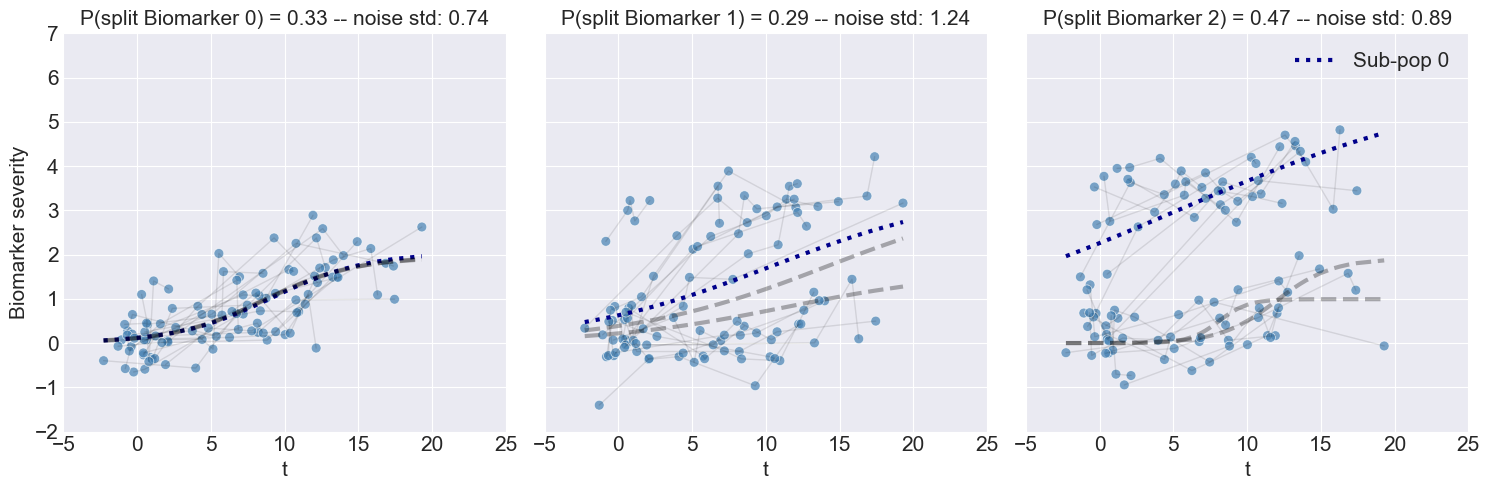

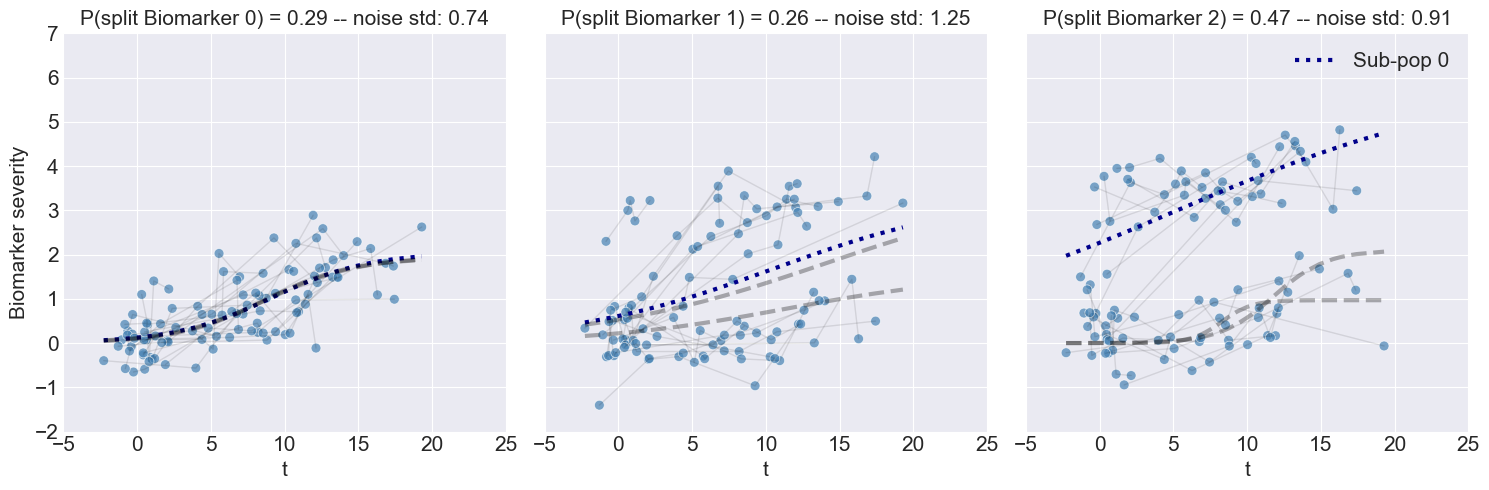

iter 6/30 -- loss: 87.1002
    P(split Biomarker_0) = 0.2597     P(split Biomarker_1) = 0.2396     P(split Biomarker_2) = 0.4783 
    noisestd Biomarker_0 = 0.7323     noisestd Biomarker_1 = 1.2395     noisestd Biomarker_2 = 0.9147 



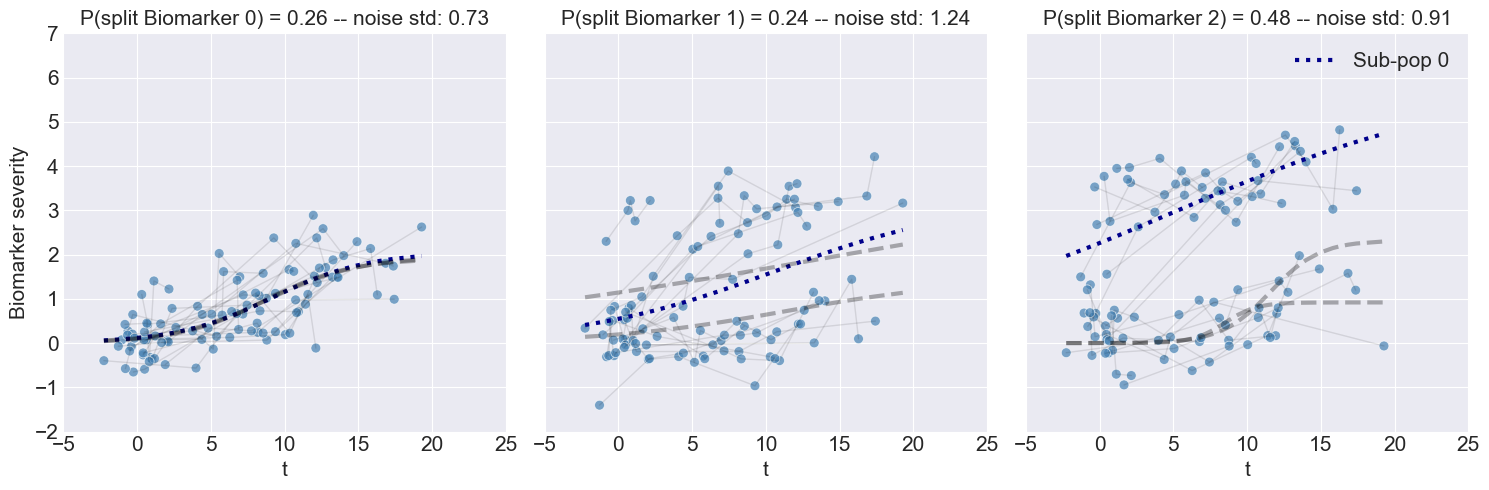

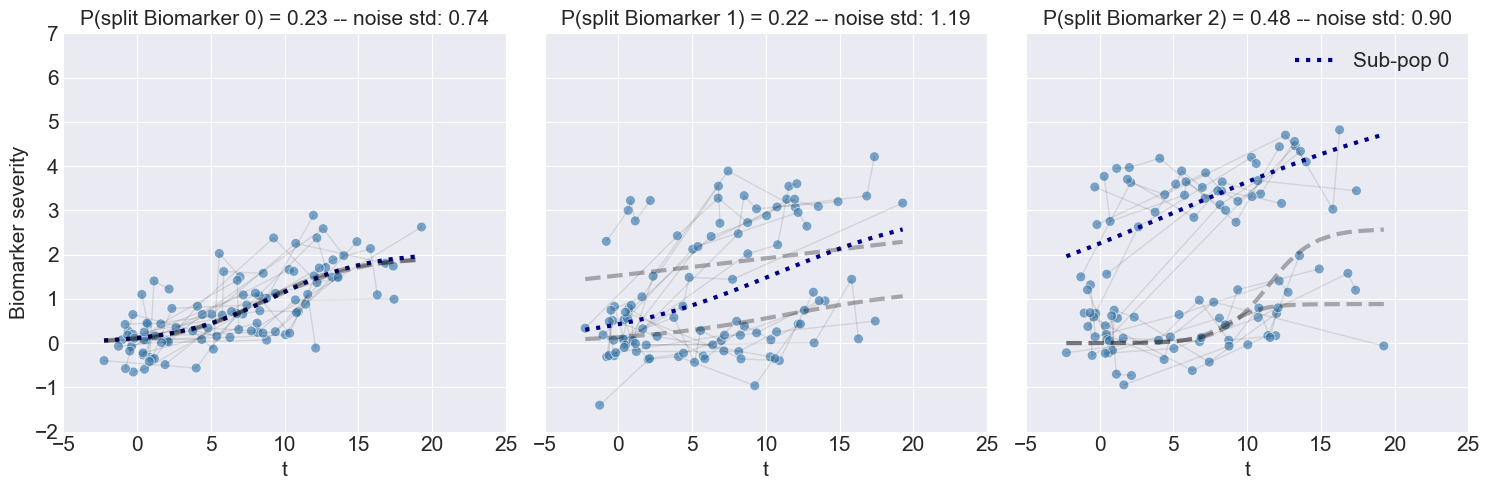

iter 8/30 -- loss: 85.7673
    P(split Biomarker_0) = 0.2023     P(split Biomarker_1) = 0.2180     P(split Biomarker_2) = 0.4895 
    noisestd Biomarker_0 = 0.7369     noisestd Biomarker_1 = 1.1613     noisestd Biomarker_2 = 0.9011 



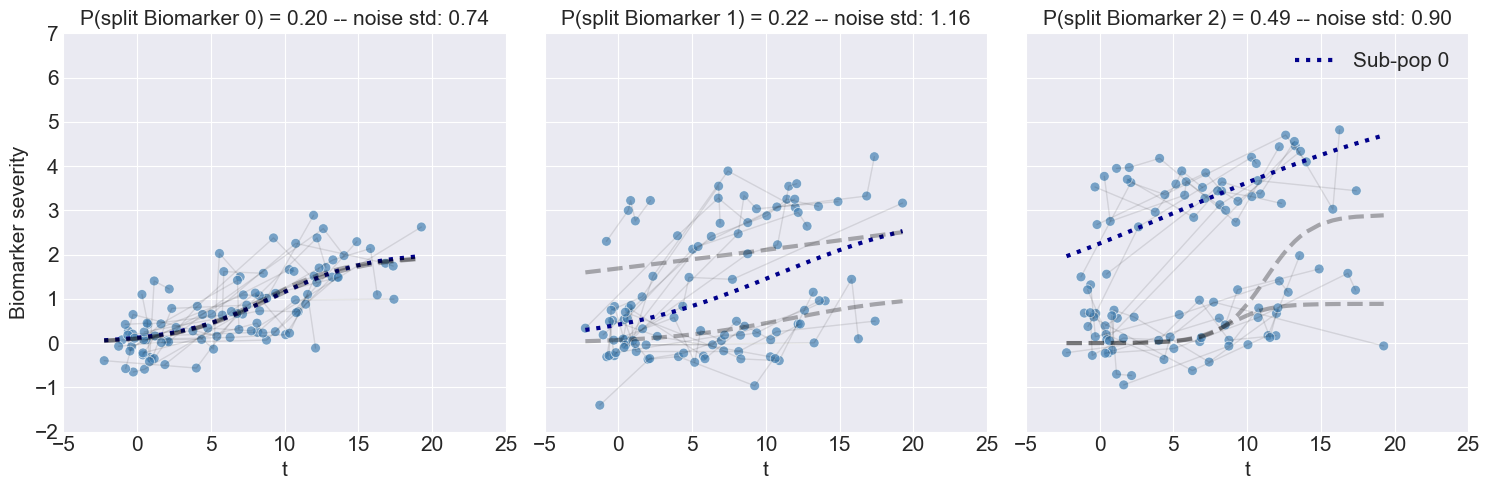

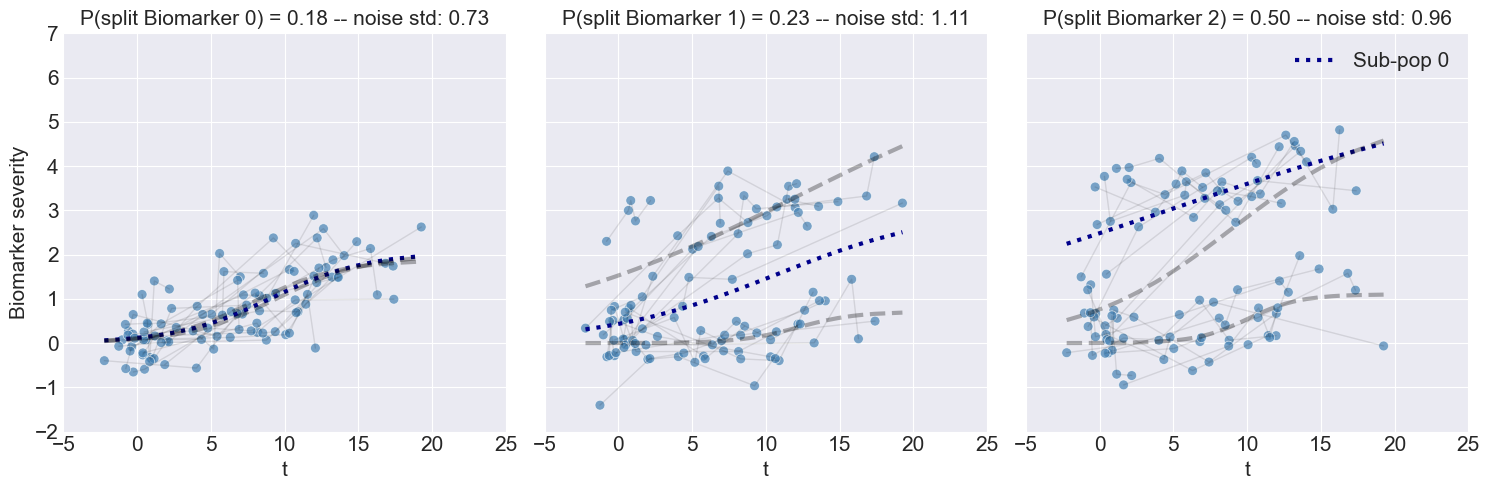

iter 10/30 -- loss: 77.6099
    P(split Biomarker_0) = 0.1556     P(split Biomarker_1) = 0.2834     P(split Biomarker_2) = 0.6252 
    noisestd Biomarker_0 = 0.7331     noisestd Biomarker_1 = 1.0942     noisestd Biomarker_2 = 0.8563 



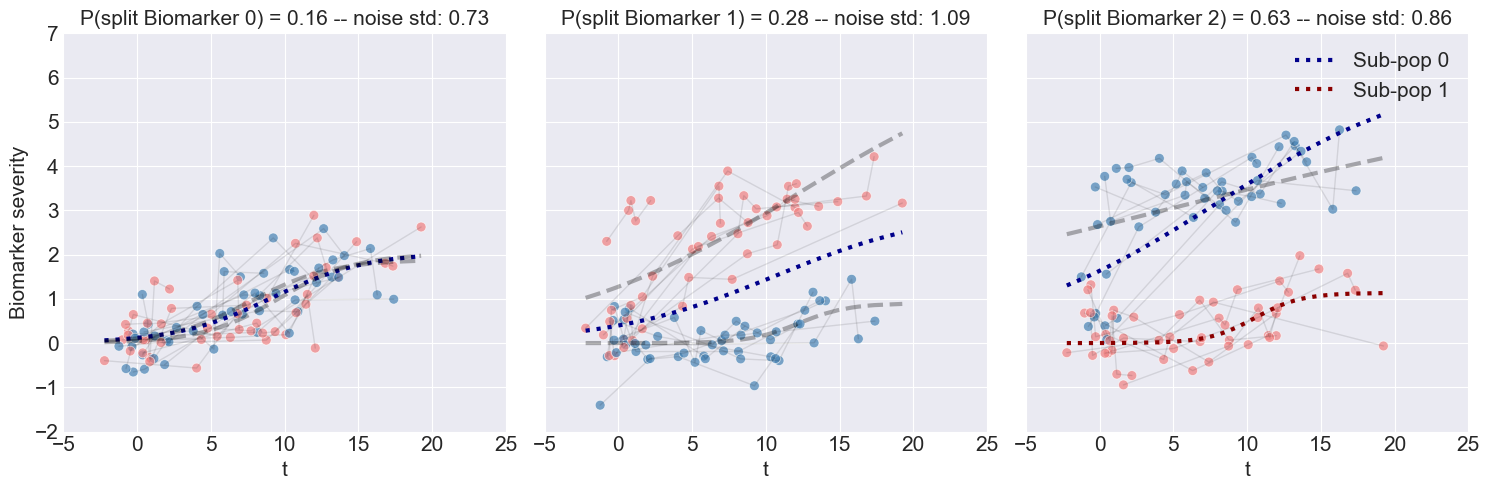

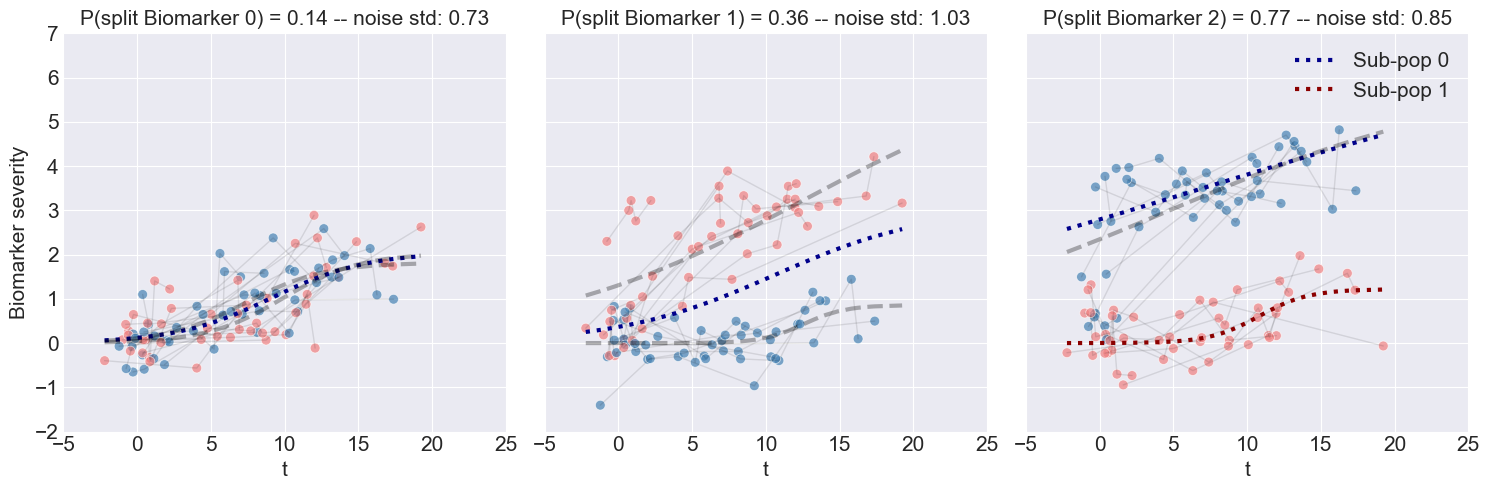

iter 12/30 -- loss: 71.4510
    P(split Biomarker_0) = 0.1201     P(split Biomarker_1) = 0.4704     P(split Biomarker_2) = 0.8544 
    noisestd Biomarker_0 = 0.7337     noisestd Biomarker_1 = 0.9078     noisestd Biomarker_2 = 0.8485 



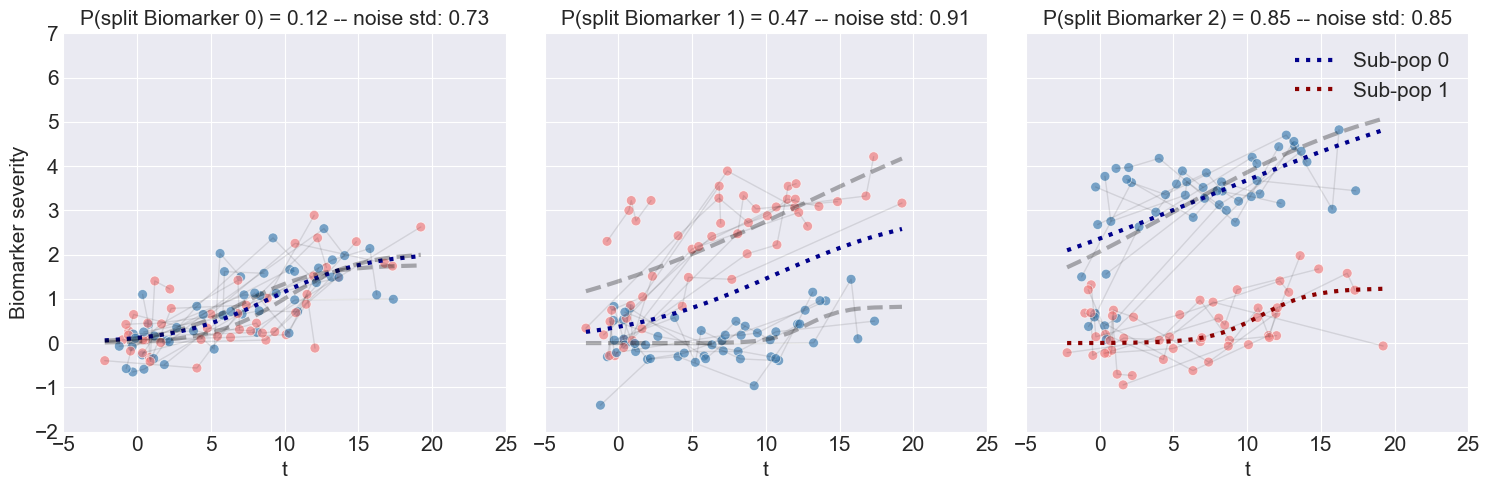

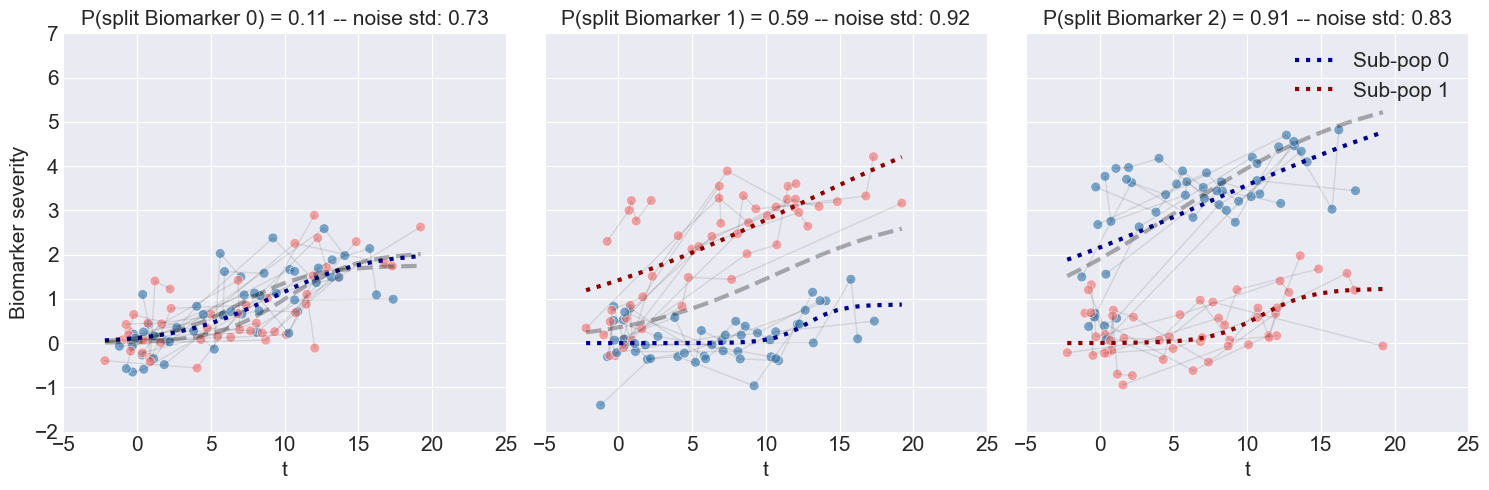

iter 14/30 -- loss: 68.2217
    P(split Biomarker_0) = 0.0927     P(split Biomarker_1) = 0.6994     P(split Biomarker_2) = 0.9499 
    noisestd Biomarker_0 = 0.7333     noisestd Biomarker_1 = 0.8826     noisestd Biomarker_2 = 0.8423 



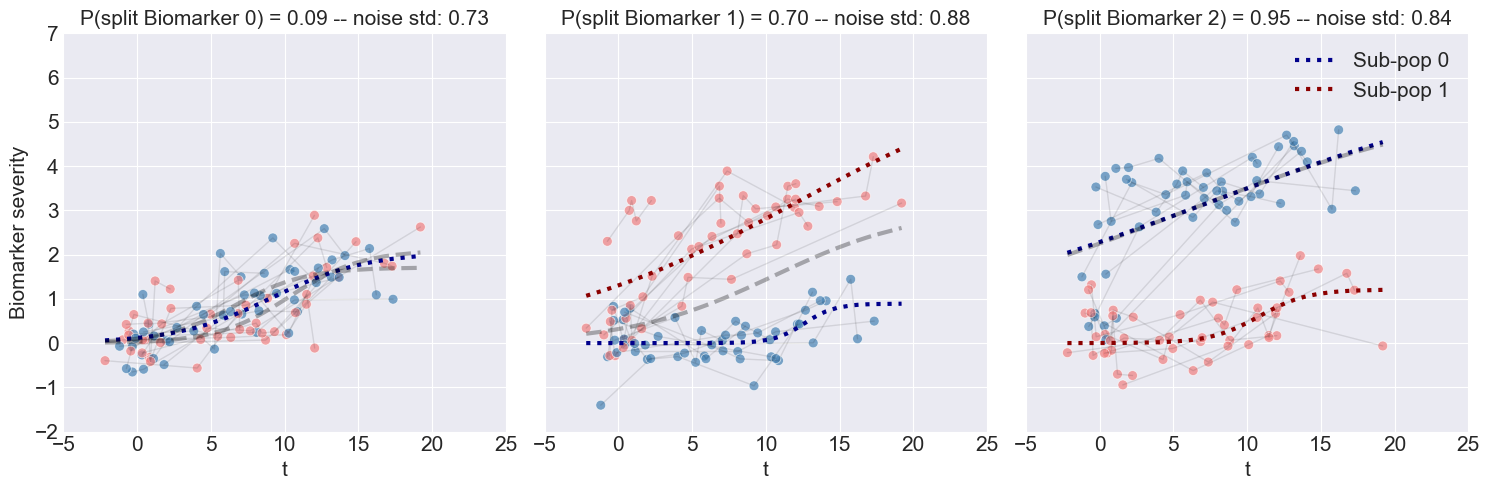

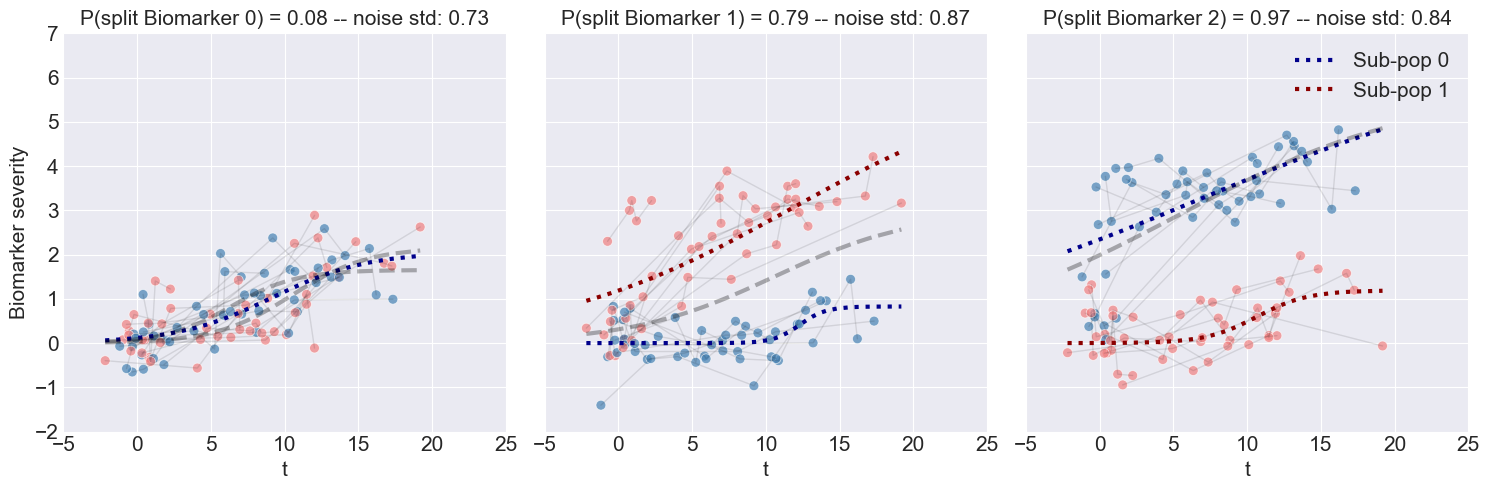

iter 16/30 -- loss: 66.3482
    P(split Biomarker_0) = 0.0714     P(split Biomarker_1) = 0.8587     P(split Biomarker_2) = 0.9816 
    noisestd Biomarker_0 = 0.7330     noisestd Biomarker_1 = 0.8104     noisestd Biomarker_2 = 0.8378 



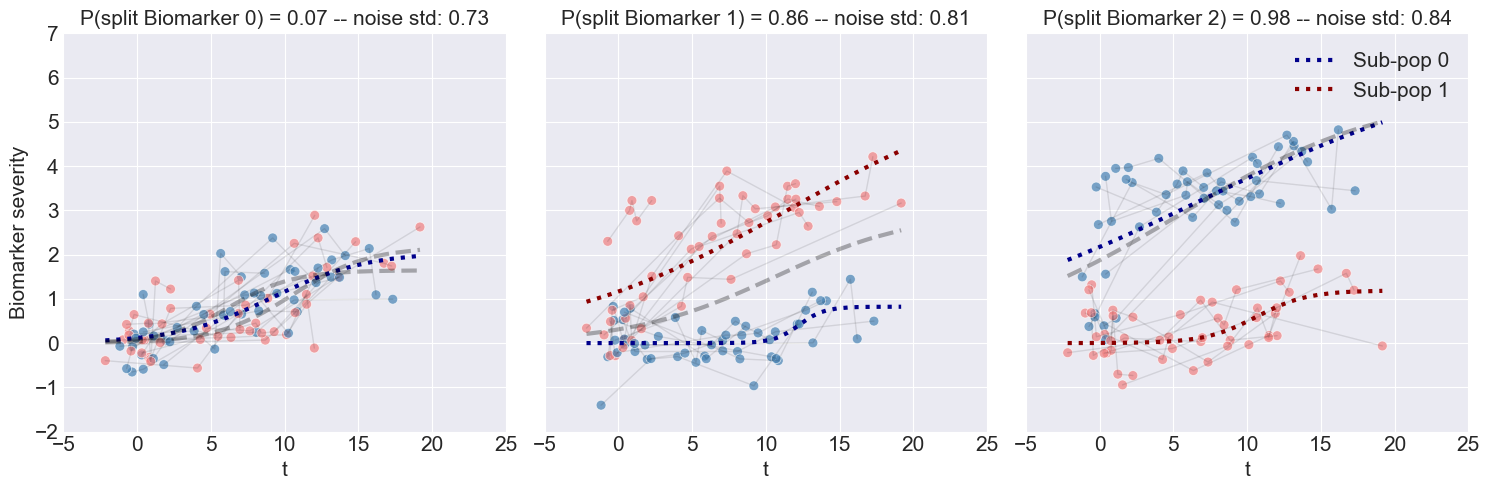

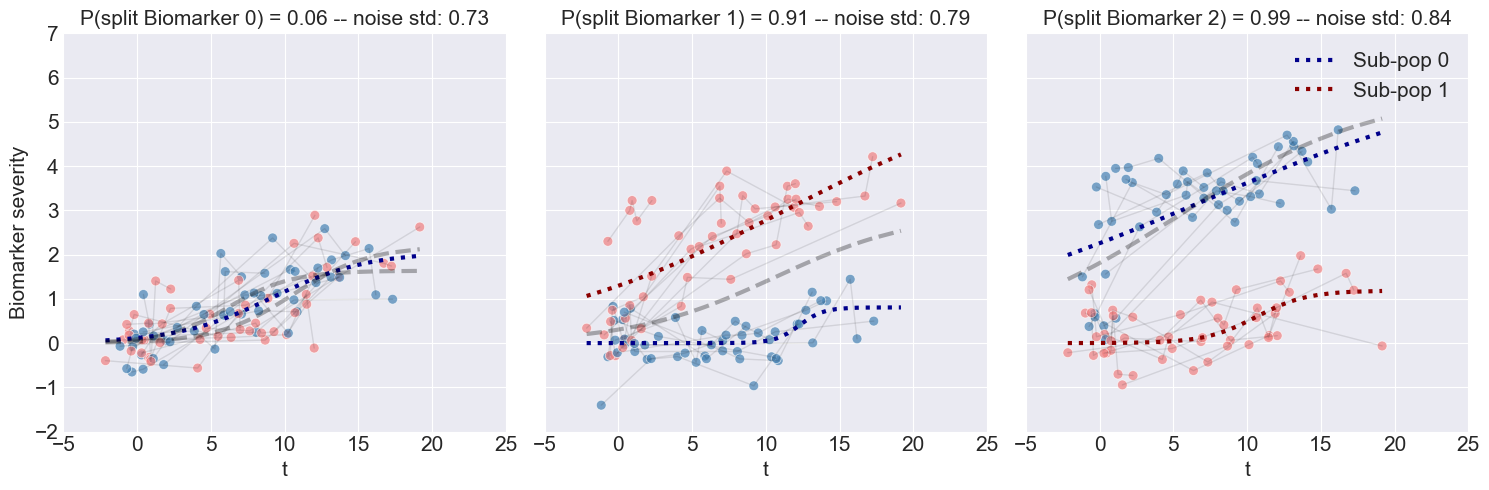

iter 18/30 -- loss: 65.5242
    P(split Biomarker_0) = 0.0549     P(split Biomarker_1) = 0.9433     P(split Biomarker_2) = 0.9933 
    noisestd Biomarker_0 = 0.7327     noisestd Biomarker_1 = 0.8213     noisestd Biomarker_2 = 0.8370 



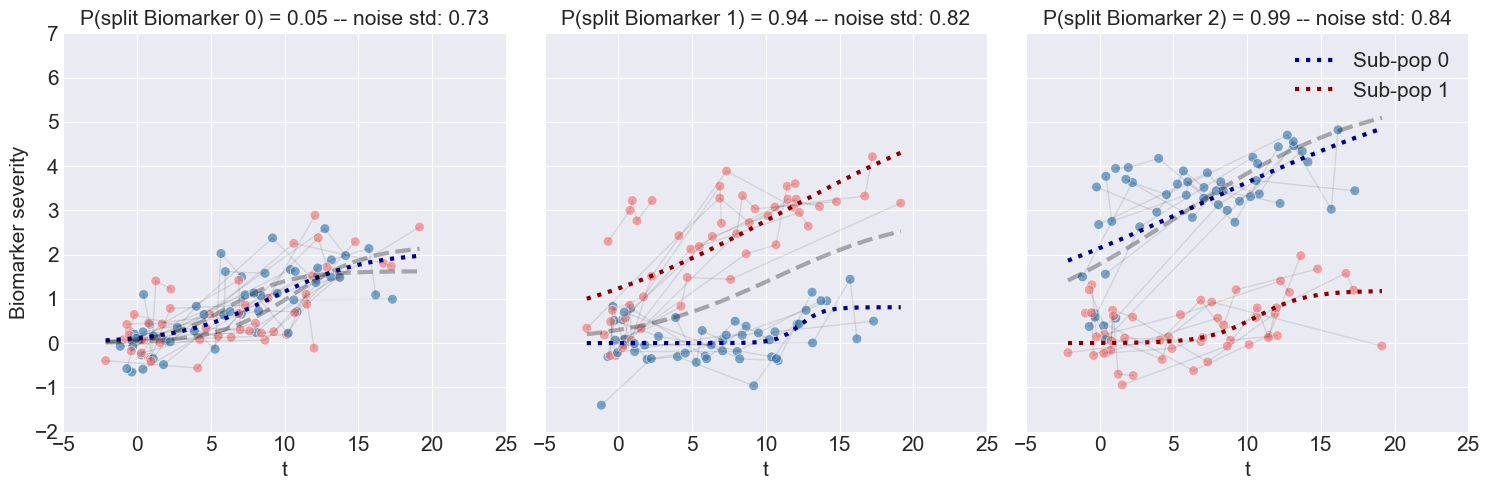

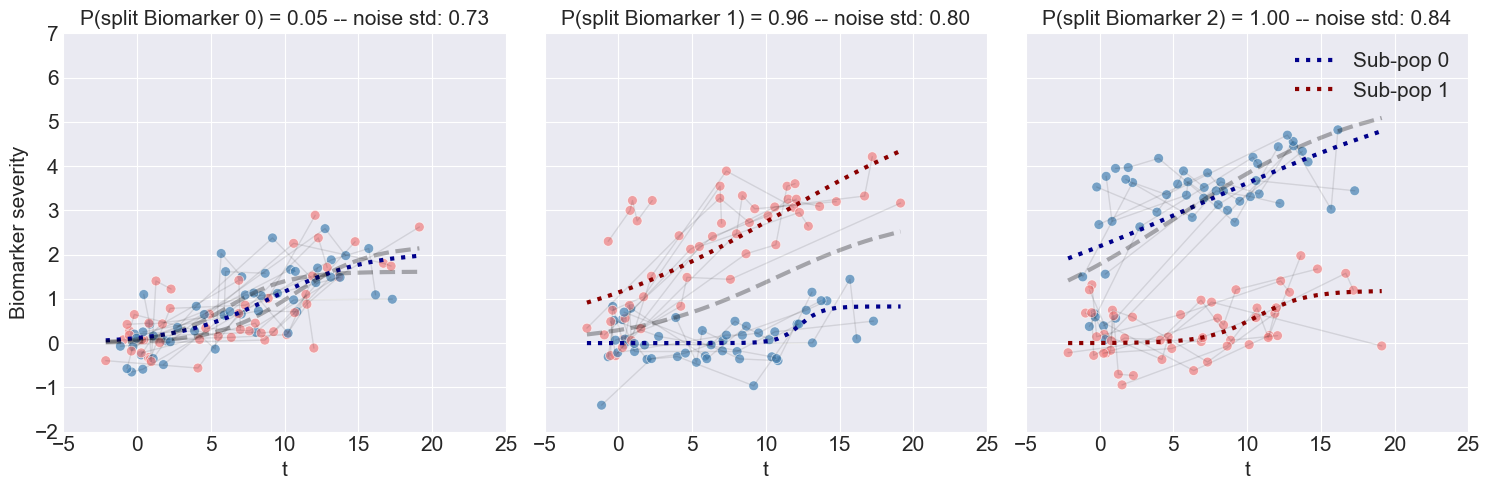

iter 20/30 -- loss: 65.1103
    P(split Biomarker_0) = 0.0420     P(split Biomarker_1) = 0.9777     P(split Biomarker_2) = 0.9976 
    noisestd Biomarker_0 = 0.7326     noisestd Biomarker_1 = 0.7801     noisestd Biomarker_2 = 0.8397 



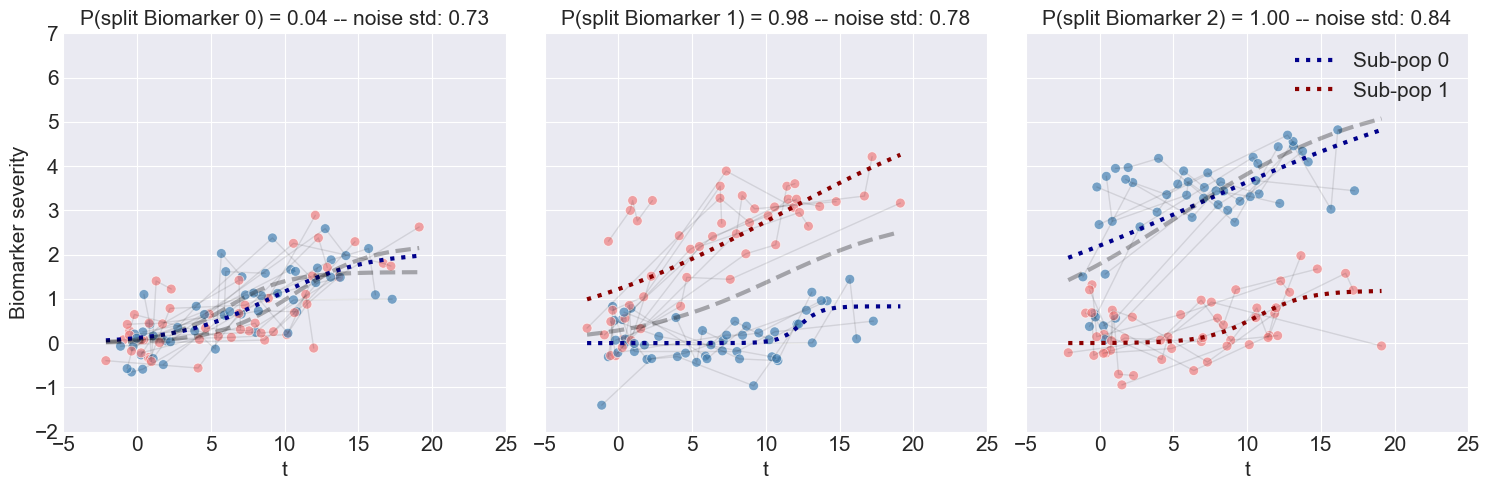

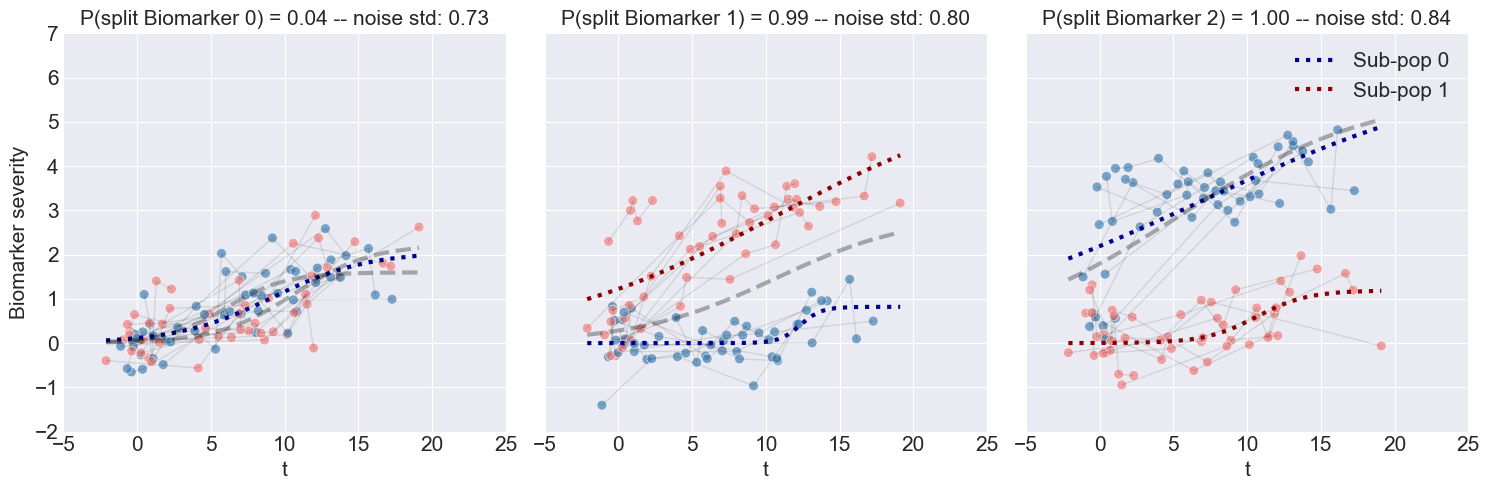

iter 22/30 -- loss: 64.8627
    P(split Biomarker_0) = 0.0321     P(split Biomarker_1) = 0.9915     P(split Biomarker_2) = 0.9992 
    noisestd Biomarker_0 = 0.7324     noisestd Biomarker_1 = 0.7958     noisestd Biomarker_2 = 0.8381 



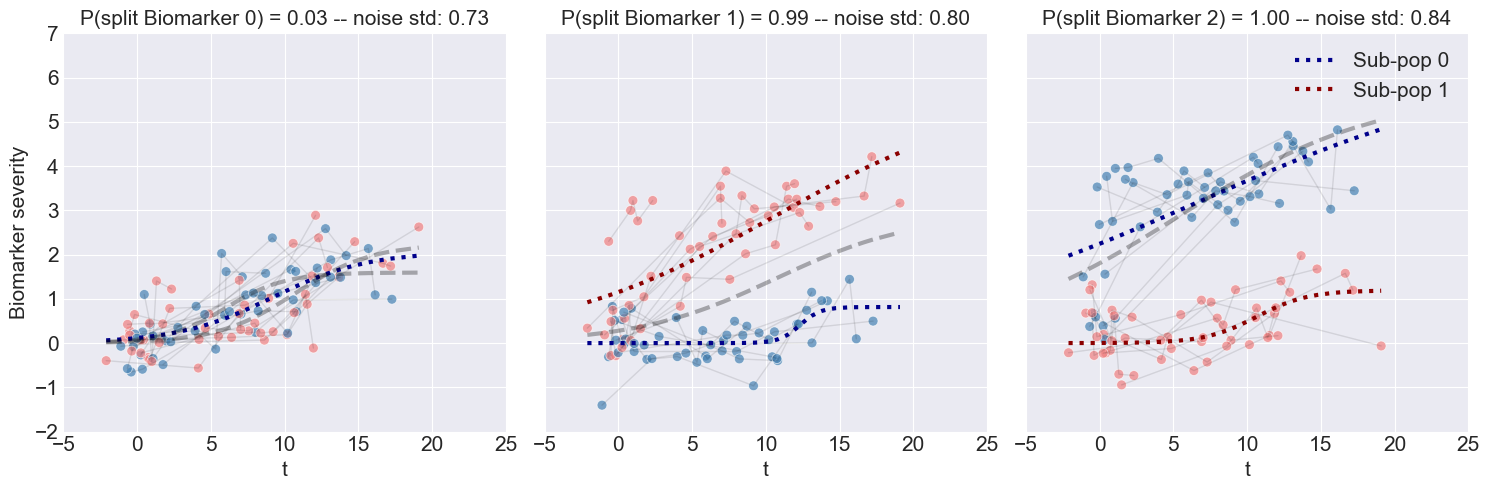

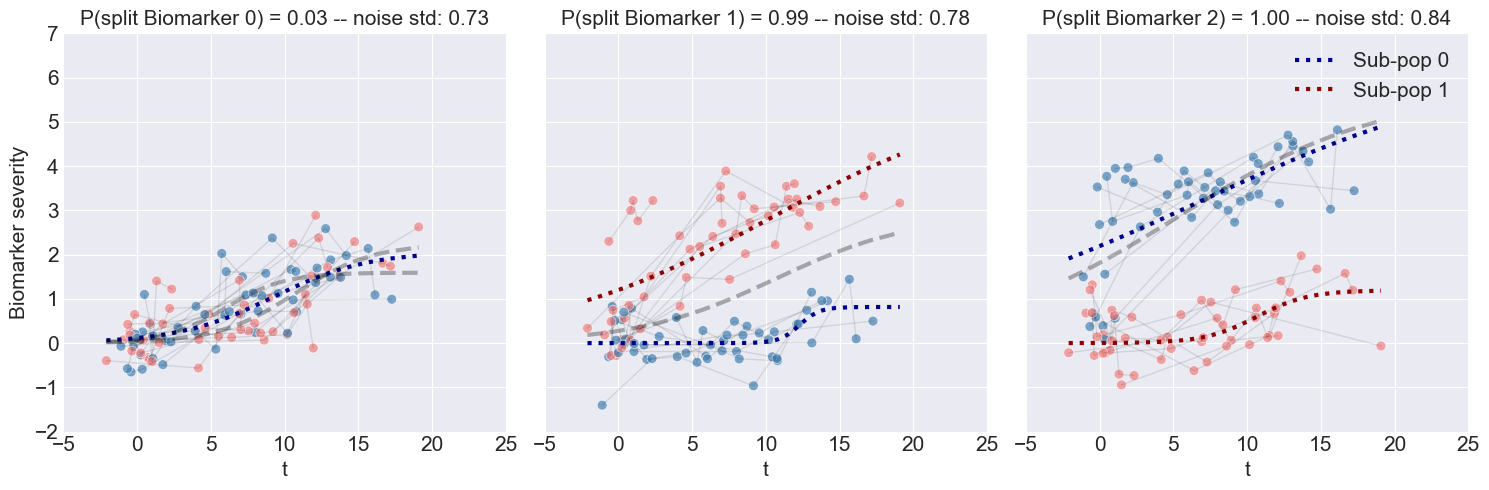

iter 24/30 -- loss: 64.7006
    P(split Biomarker_0) = 0.0245     P(split Biomarker_1) = 0.9968     P(split Biomarker_2) = 0.9997 
    noisestd Biomarker_0 = 0.7322     noisestd Biomarker_1 = 0.7965     noisestd Biomarker_2 = 0.8361 



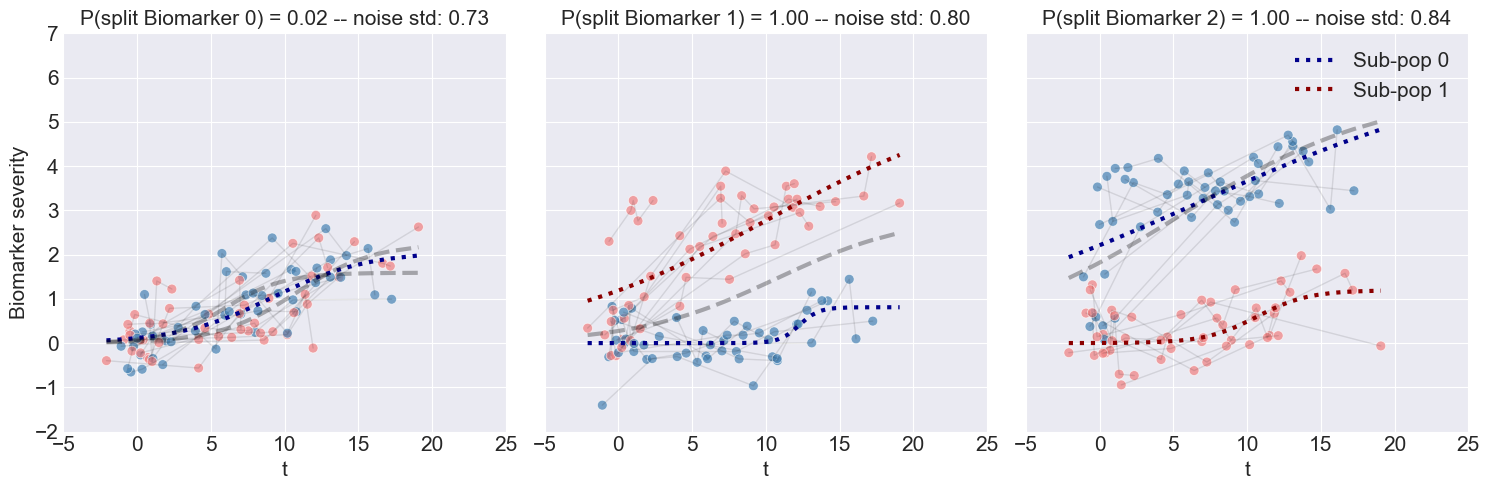

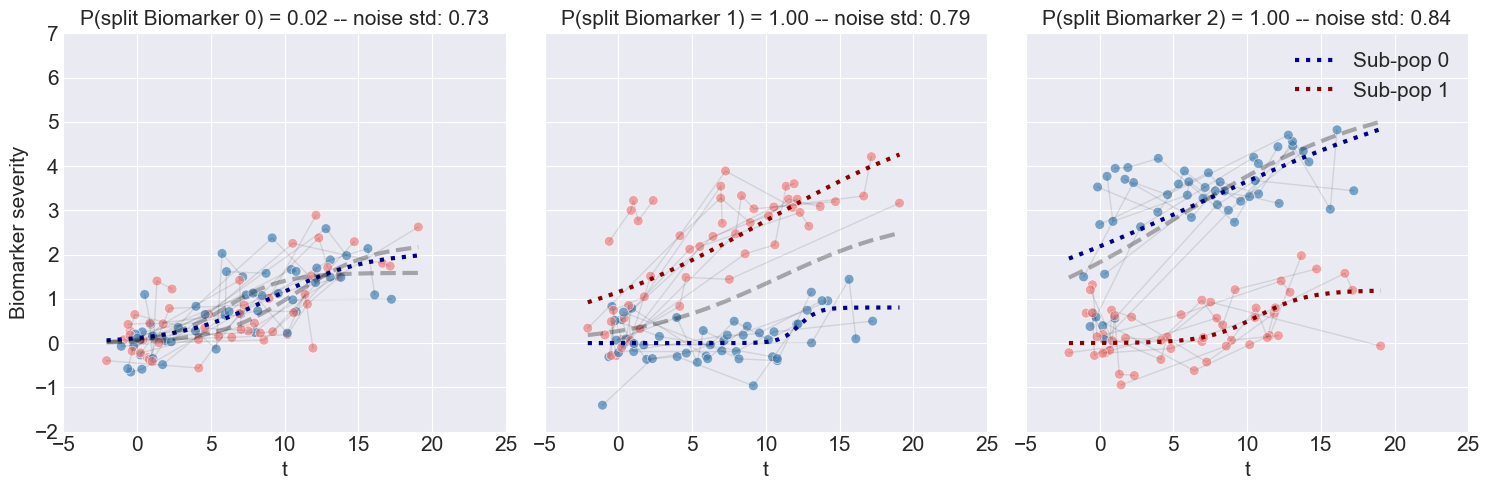

iter 26/30 -- loss: 64.5684
    P(split Biomarker_0) = 0.0187     P(split Biomarker_1) = 0.9988     P(split Biomarker_2) = 0.9999 
    noisestd Biomarker_0 = 0.7320     noisestd Biomarker_1 = 0.7829     noisestd Biomarker_2 = 0.8371 



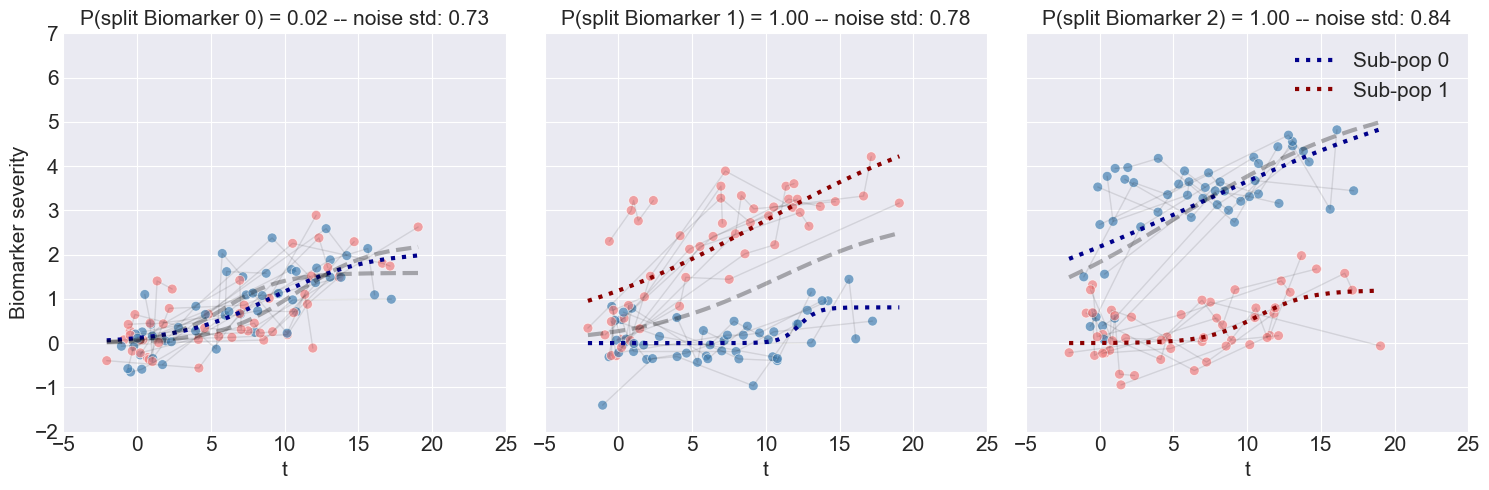

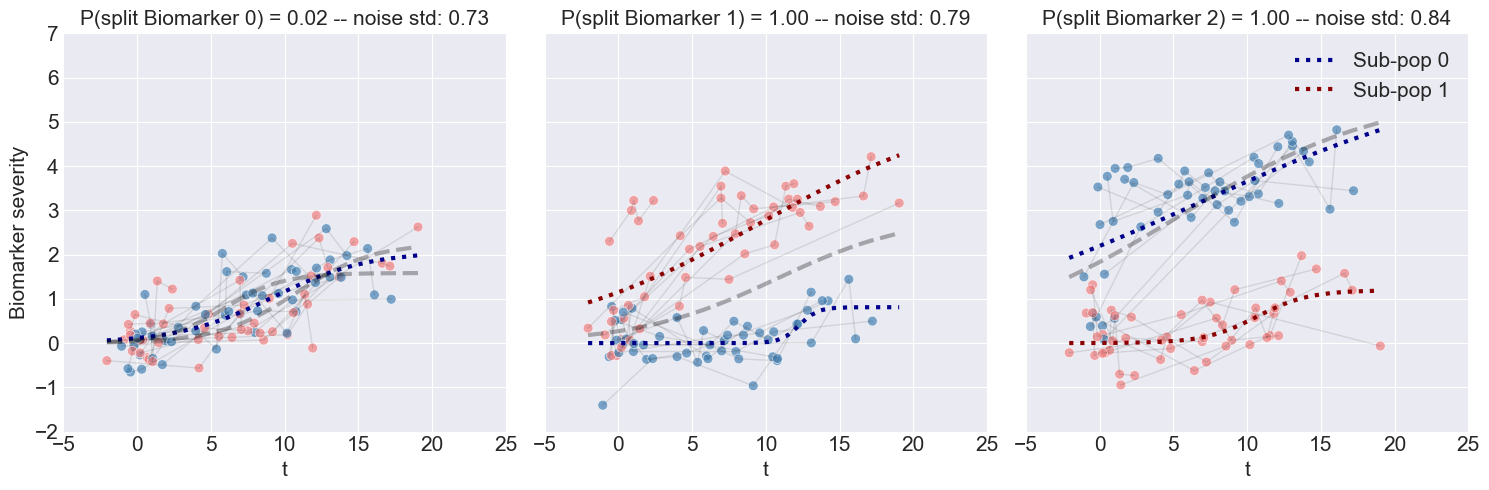

iter 28/30 -- loss: 64.4476
    P(split Biomarker_0) = 0.0142     P(split Biomarker_1) = 0.9996     P(split Biomarker_2) = 1.0000 
    noisestd Biomarker_0 = 0.7317     noisestd Biomarker_1 = 0.7895     noisestd Biomarker_2 = 0.8371 



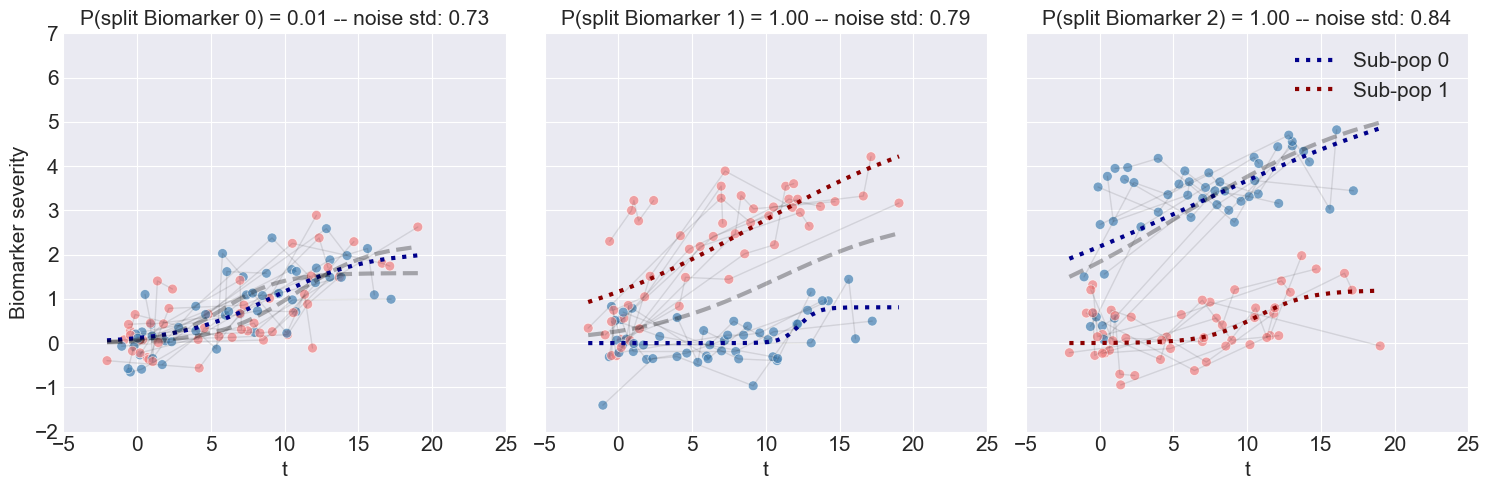

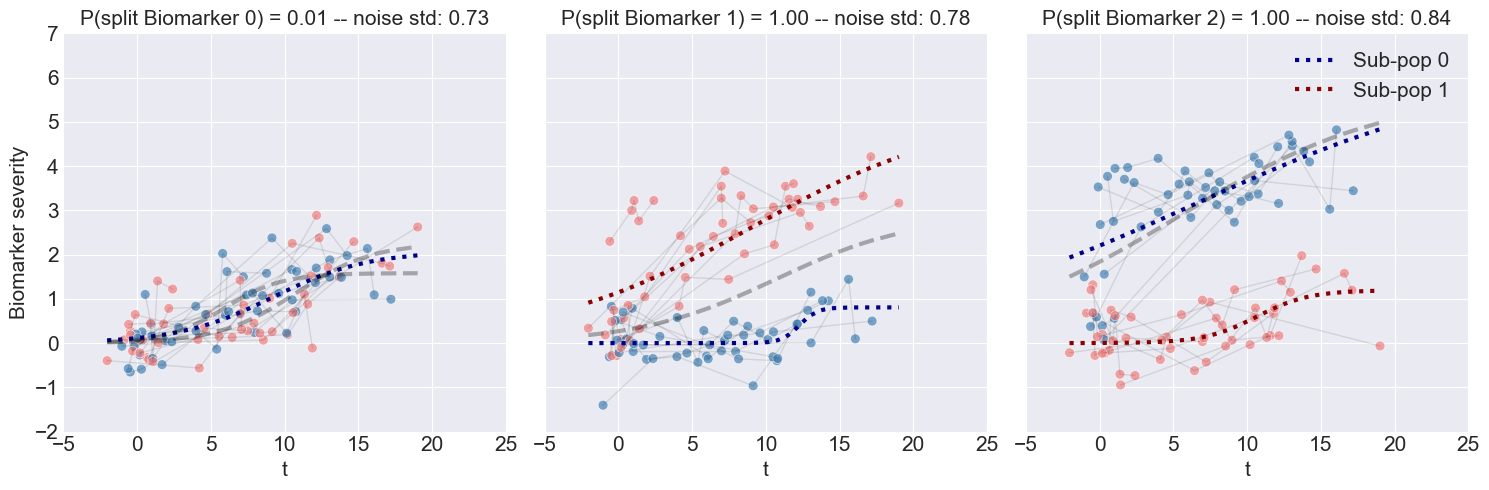

iter 30/30 -- loss: 64.3314
    P(split Biomarker_0) = 0.0108     P(split Biomarker_1) = 0.9998     P(split Biomarker_2) = 1.0000 
    noisestd Biomarker_0 = 0.7315     noisestd Biomarker_1 = 0.7890     noisestd Biomarker_2 = 0.8360 



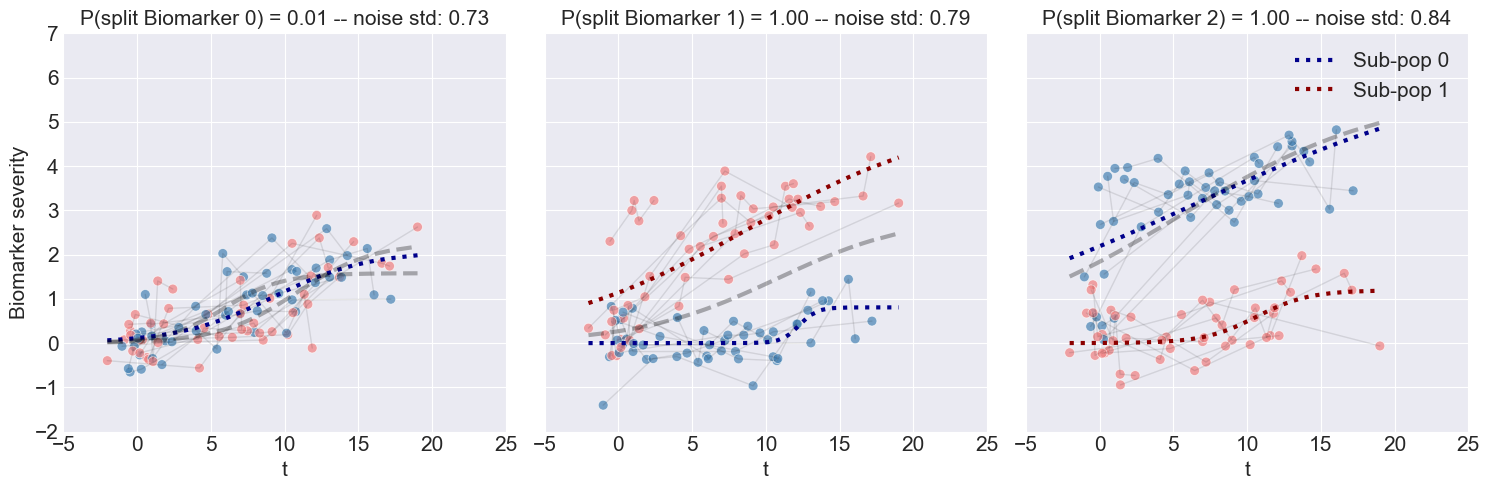

Elapsed time: 233.7643s


In [6]:
dpmost.optimise(n_outer_iterations=30, 
                n_inner_iterations_time_shift=100, 
                n_inner_iterations_theta=50, 
                lr_theta=1e-1, 
                lr_time_shift=1e-1)

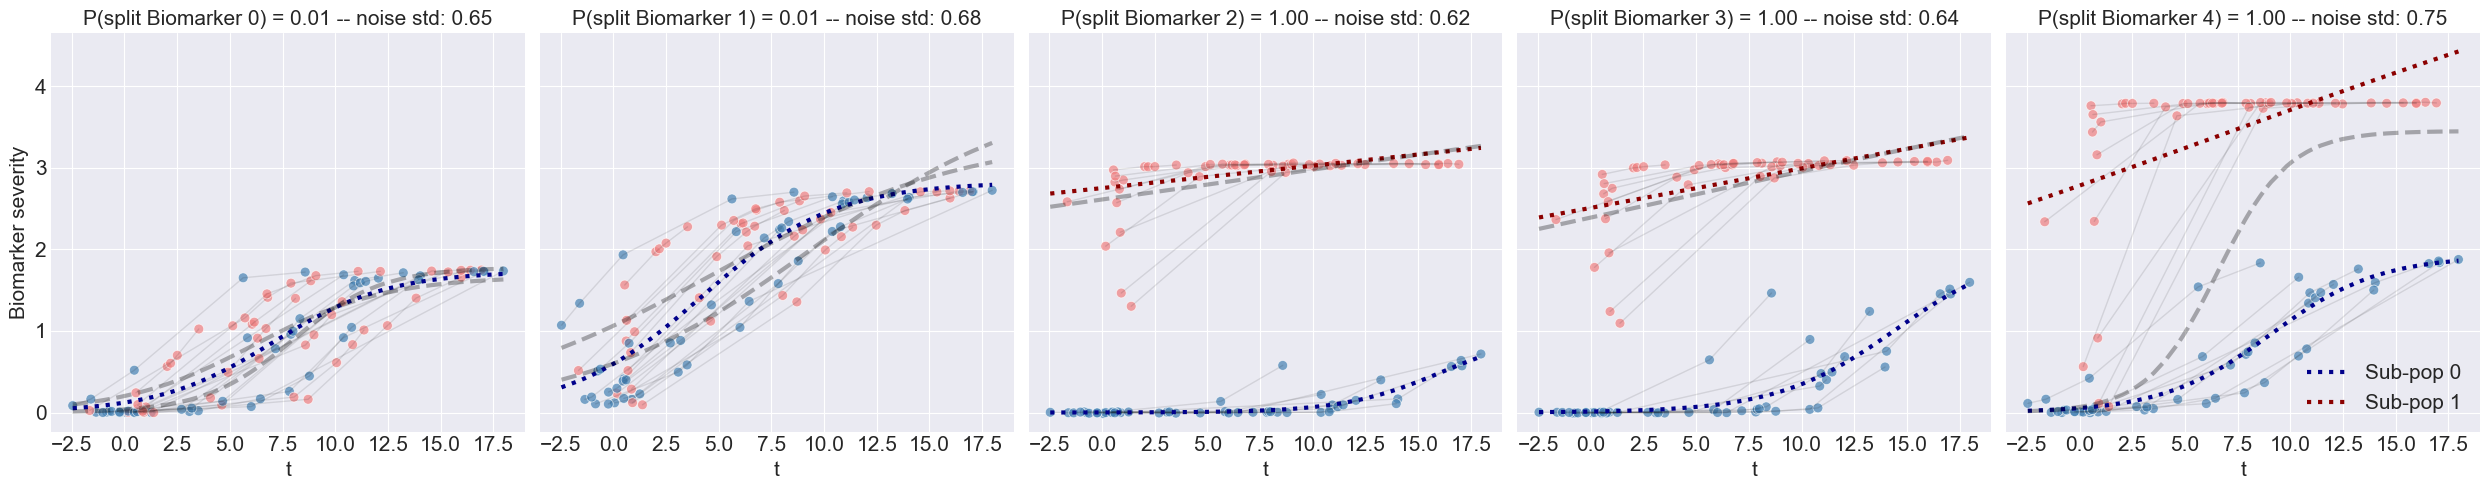

In [ ]:
plot_solution(dpmost, show=True, save=False)